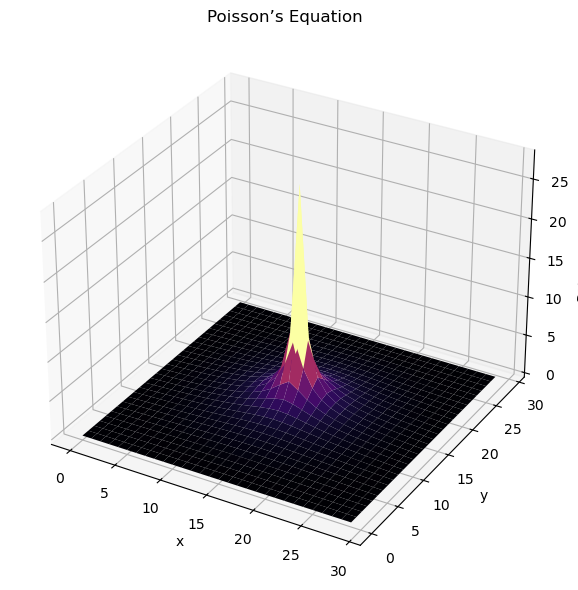

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nx, ny, nz = 30, 30, 30
V = np.zeros((nx, ny, nz))
rho = np.zeros((nx, ny, nz))

rho[nx//2, ny//2, nz//2] = 1e-9
epsilon = 8.85e-12

for _ in range(6000):
    V[1:-1, 1:-1, 1:-1] = (
        V[1:-1, 1:-1, :-2] + V[1:-1, 1:-1, 2:] +
        V[1:-1, :-2, 1:-1] + V[1:-1, 2:, 1:-1] +
        V[:-2, 1:-1, 1:-1] + V[2:, 1:-1, 1:-1] +
        rho[1:-1, 1:-1, 1:-1] / epsilon
    ) / 6


mid = V[:, :, nz//2]

x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, mid, cmap='inferno')

ax.set_title("Poisson’s Equation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Potential (V)")

plt.tight_layout()
plt.show()
